#  Sleep Health and Lifestyle Analysis  /  Uyku Sağlığı ve Yaşam Tarzı Analizi 


In [19]:
# Importing Libraries / Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [23]:
# Loading the Dataset / Veri Setinin Yüklenmesi
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [25]:
# Initial Data Exploration / İlk Veri İncelemesi
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [29]:
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [31]:
# Handling Missing Values / Eksik Değerlerin İşlenmesi
df["Sleep Disorder"].fillna("None", inplace=True)

In [47]:
#Blood Pressure Feature Engineering / Kan Basıncı Özellik Mühendisliği
df[["Systolic", "Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True).astype(float)
df.drop("Blood Pressure", axis=1, inplace=True)

In [51]:
# Encoding Categorical Variables / Kategorik Verilerin Kodlanması
cat_cols = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [53]:
# Feature Scaling / Özellik Ölçekleme
scaler = StandardScaler()
num_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [55]:
# Feature & Target Split / Özellik ve Hedef Ayrımı
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [57]:
# Train-Test Split / Eğitim-Test Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Model Training and Evaluation / Model Eğitimi ve Değerlendirme
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [61]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results / Sonuçları")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Decision Tree Results / Sonuçları
[[13  2  1]
 [ 0 43  0]
 [ 3  1 12]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.93      1.00      0.97        43
           2       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.89      0.85      0.87        75
weighted avg       0.91      0.91      0.90        75


Random Forest Results / Sonuçları
[[13  1  2]
 [ 1 42  0]
 [ 4  1 11]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75


SVM Results / Sonuçları
[[ 1 14  1]
 [ 0 43  0]
 [ 1 11  4]]
              precision    recal

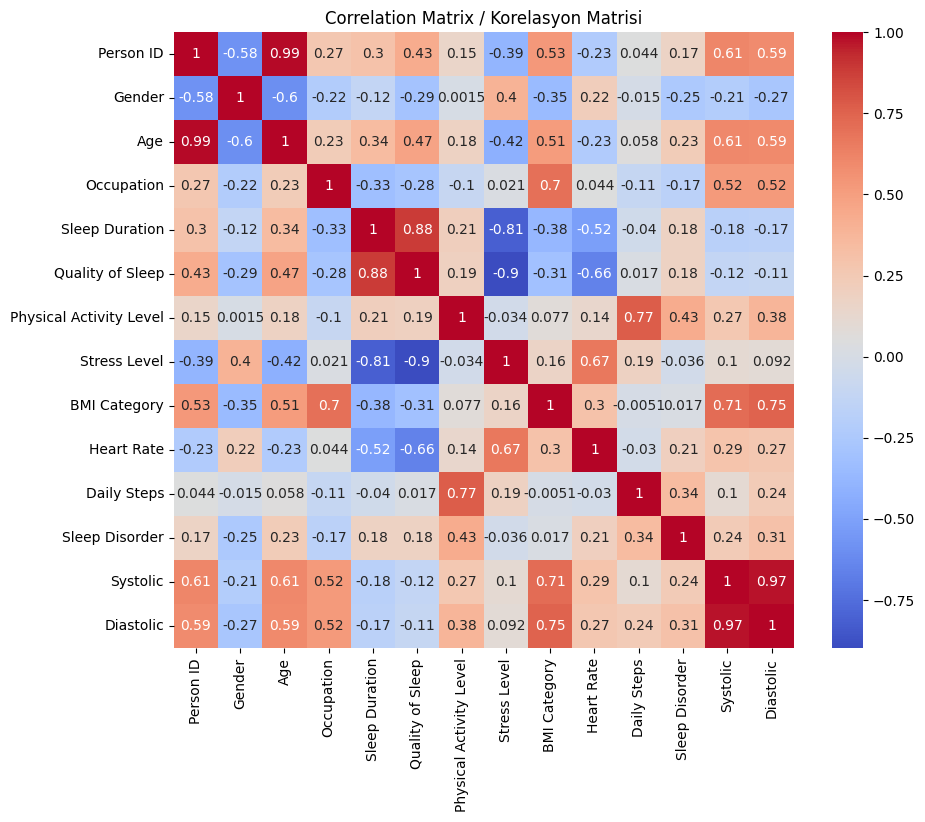

In [63]:
# Correlation Heatmap / Korelasyon Isı Haritası
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix / Korelasyon Matrisi")
plt.show()

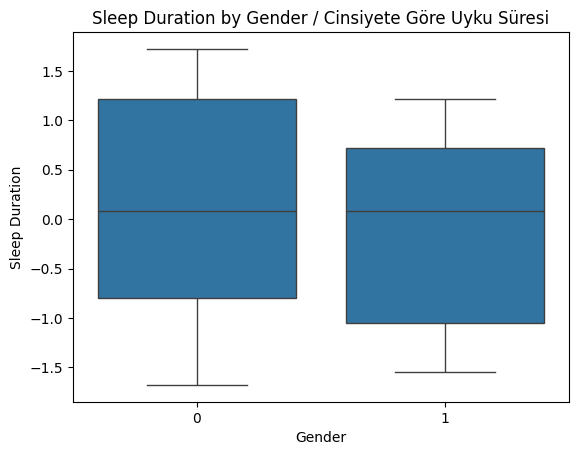

In [65]:
# Sleep Duration by Gender / Cinsiyete Göre Uyku Süresi
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title("Sleep Duration by Gender / Cinsiyete Göre Uyku Süresi")
plt.show()

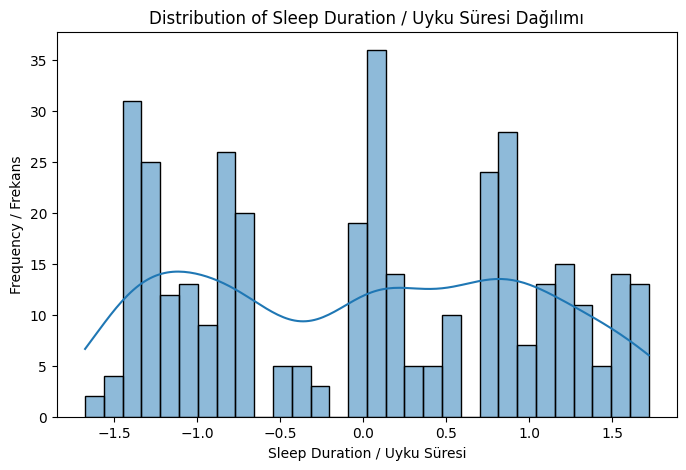

In [69]:
# Distribution of Sleep Duration / Uyku Süresi Dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], kde=True, bins=30)
plt.title("Distribution of Sleep Duration / Uyku Süresi Dağılımı")
plt.xlabel("Sleep Duration / Uyku Süresi")
plt.ylabel("Frequency / Frekans")
plt.show()

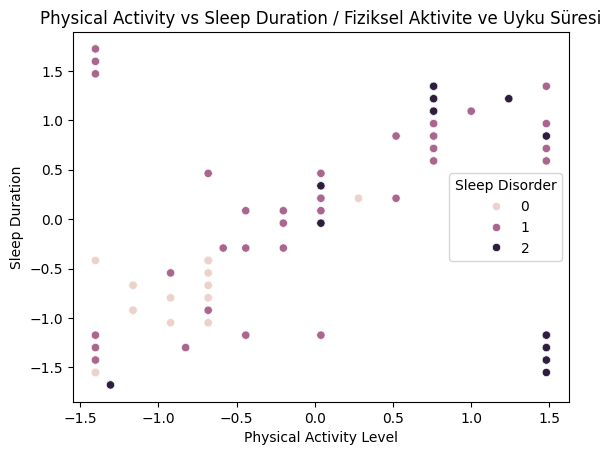

In [71]:
# Physical Activity vs Sleep Quality / Fiziksel Aktivite ve Uyku Kalitesi Arasındaki İlişki
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', hue='Sleep Disorder', data=df)
plt.title("Physical Activity vs Sleep Duration / Fiziksel Aktivite ve Uyku Süresi")
plt.show()